In [1]:
import igraph as ig
import matplotlib.pyplot as plt
import numpy as np
# Number of nodes in the graph
n = 500
# List of probabilities p for edge creation
# p = [i * 0.1 for i in range(n + 1)]
pk = np.linspace(0, 0.025, n)
# List with sizes of largest components
largest_cc = []
# Create an Erdos-Renyi graph for each probability p
for p in pk:
    # Create a random graph with probability p
    er = ig.Graph.Erdos_Renyi(n, p)
    largest_cc.append(len(max(er.connected_components(mode = 'weak'), key=len)))

In [8]:
n = 500
p = 0.3

g = ig.Graph.Erdos_Renyi(n, p)

print(np.mean(g.distances()))

1.695992


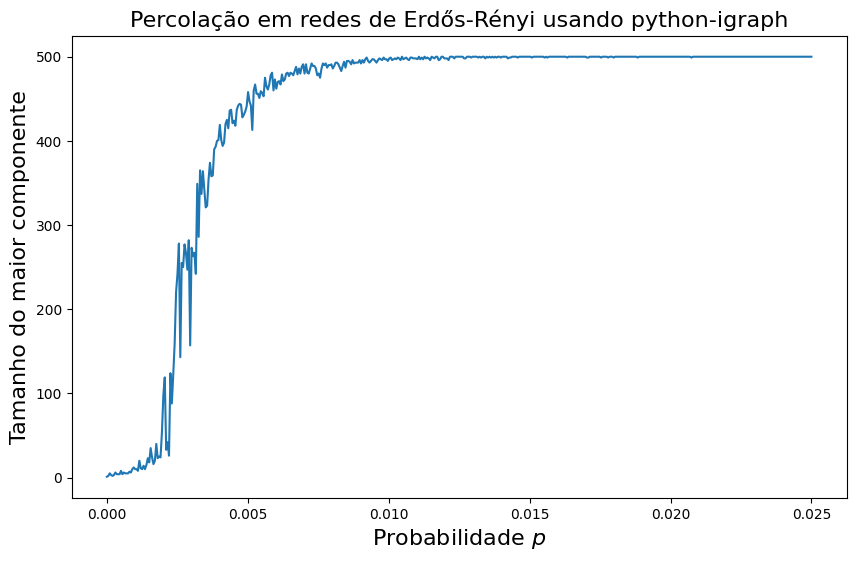

In [91]:
plt.figure(figsize=(10,6))
plt.plot(pk, largest_cc)
plt.title(r'Percolação em redes de Erdős-Rényi usando python-igraph', fontsize = 16)
plt.xlabel("Probabilidade $p$", fontsize = 16)
plt.ylabel("Tamanho do maior componente", fontsize = 16)
plt.show()

## Efeito de mundo pequeno (Strogatz-Watts)

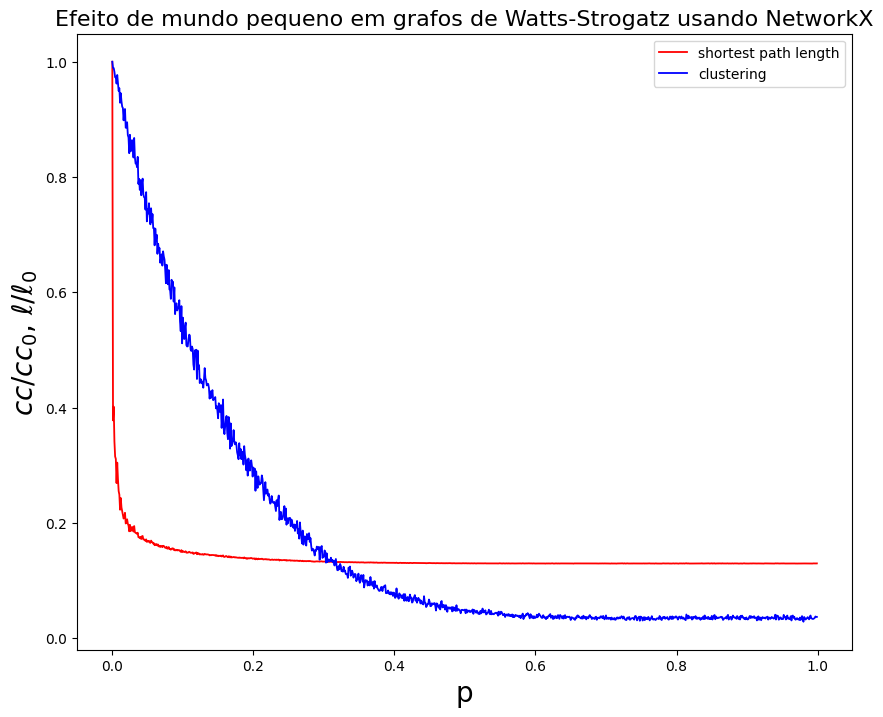

In [93]:
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt

n = 500
k = 12

vL = []
vC = []
vP = np.arange(0, 1, 0.001)

for p in vP:
    g = ig.Graph.Watts_Strogatz(dim=1, size=n, nei=k // 2, p=p)
    C = g.transitivity_avglocal_undrirected()
    L = g.average_path_length()
    vC.append(C)
    vL.append(L)

fig, ax = plt.subplots(figsize=(10, 8))

plt.plot(vP, np.array(vL)/vL[0], color="red", linewidth=1.3, label="shortest path length")
plt.plot(vP, np.array(vC)/vC[0], color="blue", linewidth=1.3, label="clustering")

plt.title("Efeito de mundo pequeno em grafos de Watts-Strogatz usando NetworkX", fontsize=16)

plt.xlabel("p", fontsize=20)
plt.ylabel("$cc/cc_0$, $\ell/\ell_0$", fontsize=20)
plt.legend()

plt.show()

## Resiliência a ataques aleatórios e direcionados (Albert, Barabási e Jeong)